In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Roadaccident.csv to Roadaccident (3).csv


In [ ]:
import pandas as pd
df = pd.read_csv('Roadaccident.csv')
df.head()

,Districts/ Year,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1977,1976,1975,1974,1973,1972,1971,1970,1969,1968
0,Gurdaspur,191,178,178,227,NaN,NaN,245,245,267,...,58.0,54.0,55.0,22.0,22.0,23.0,28.0,28.0,26.0,34.0
1,Pathankot,95,131,92,115,NaN,NaN,155,155,126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amritsar,285,280,243,372,NaN,NaN,356,356,353,...,94.0,106.0,102.0,39.0,39.0,39.0,39.0,76.0,87.0,11.0
3,Tarn Taran,126,123,97,134,NaN,NaN,137,137,167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kapurthala,136,134,144,213,NaN,NaN,200,200,204,...,18.0,26.0,21.0,34.0,34.0,43.0,28.0,40.0,42.0,24.0


In [ ]:
df.rename(columns={df.columns[0]: 'District'}, inplace=True)
df_long = df.melt(id_vars=["District"], var_name="Year", value_name="Accidents")
df_long.dropna(subset=["Accidents"], inplace=True)
df_long["Year"] = pd.to_numeric(df_long["Year"])
df_long["Accidents"] = pd.to_numeric(df_long["Accidents"])
df_long.head()


,District,Year,Accidents
0,Gurdaspur,2022,191.0
1,Pathankot,2022,95.0
2,Amritsar,2022,285.0
3,Tarn Taran,2022,126.0
4,Kapurthala,2022,136.0


In [ ]:
df_long["Severity"] = pd.qcut(df_long["Accidents"], q=3, labels=["Low", "Medium", "High"])
df_long.head()


,District,Year,Accidents,Severity
0,Gurdaspur,2022,191.0,Medium
1,Pathankot,2022,95.0,Low
2,Amritsar,2022,285.0,High
3,Tarn Taran,2022,126.0,Medium
4,Kapurthala,2022,136.0,Medium


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_long["District_encoded"] = le.fit_transform(df_long["District"])
X = df_long[["Year", "District_encoded"]]
y = df_long["Severity"]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((656, 2), (165, 2))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("🎯 Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\n📝 Classification Report (Logistic Regression):\n")
print(classification_report(y_test, lr_pred))


🎯 Logistic Regression Accuracy: 0.5333333333333333

📝 Classification Report (Logistic Regression):

              precision    recall  f1-score   support

        High       0.60      0.69      0.64        58
         Low       0.59      0.74      0.65        50
      Medium       0.31      0.19      0.24        57

    accuracy                           0.53       165
   macro avg       0.50      0.54      0.51       165
weighted avg       0.50      0.53      0.51       165



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("🎯 Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\n📝 Classification Report (Decision Tree):\n")
print(classification_report(y_test, dt_pred))


🎯 Decision Tree Accuracy: 0.7757575757575758

📝 Classification Report (Decision Tree):

              precision    recall  f1-score   support

        High       0.90      0.90      0.90        58
         Low       0.73      0.72      0.73        50
      Medium       0.69      0.70      0.70        57

    accuracy                           0.78       165
   macro avg       0.77      0.77      0.77       165
weighted avg       0.78      0.78      0.78       165



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("🎯 Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\n📝 Classification Report (Random Forest):\n")
print(classification_report(y_test, rf_pred))


🎯 Random Forest Accuracy: 0.7454545454545455

📝 Classification Report (Random Forest):

              precision    recall  f1-score   support

        High       0.79      0.84      0.82        58
         Low       0.75      0.78      0.76        50
      Medium       0.69      0.61      0.65        57

    accuracy                           0.75       165
   macro avg       0.74      0.75      0.74       165
weighted avg       0.74      0.75      0.74       165



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_tuned = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_split=4,
    random_state=42
)

dt_tuned.fit(X_train, y_train)
dt_pred = dt_tuned.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("🎯 Tuned Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\n📝 Classification Report (Tuned Decision Tree):\n")
print(classification_report(y_test, dt_pred))


🎯 Tuned Decision Tree Accuracy: 0.793939393939394

📝 Classification Report (Tuned Decision Tree):

              precision    recall  f1-score   support

        High       0.84      0.93      0.89        58
         Low       0.77      0.80      0.78        50
      Medium       0.76      0.65      0.70        57

    accuracy                           0.79       165
   macro avg       0.79      0.79      0.79       165
weighted avg       0.79      0.79      0.79       165



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 4, 6],
    'criterion': ['gini', 'entropy']
}
base_dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=base_dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
best_pred = best_dt.predict(X_test)
print("🔍 Best Parameters:", grid_search.best_params_)
print("🎯 GridSearch Accuracy:", accuracy_score(y_test, best_pred))
print("\n📝 Classification Report:\n")
print(classification_report(y_test, best_pred))


🔍 Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}
🎯 GridSearch Accuracy: 0.793939393939394

📝 Classification Report:

              precision    recall  f1-score   support

        High       0.90      0.91      0.91        58
         Low       0.76      0.74      0.75        50
      Medium       0.72      0.72      0.72        57

    accuracy                           0.79       165
   macro avg       0.79      0.79      0.79       165
weighted avg       0.79      0.79      0.79       165



<Figure size 600x400 with 0 Axes>

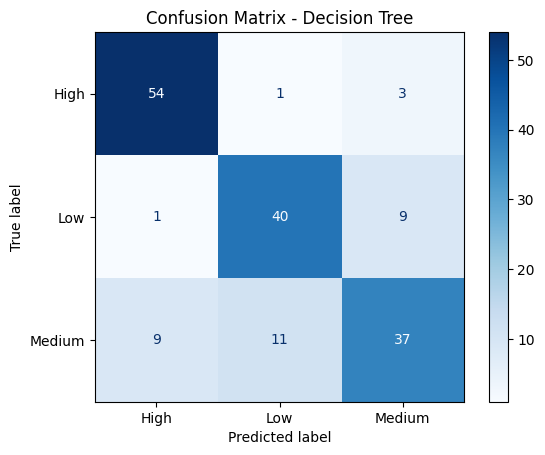

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, dt_pred, labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


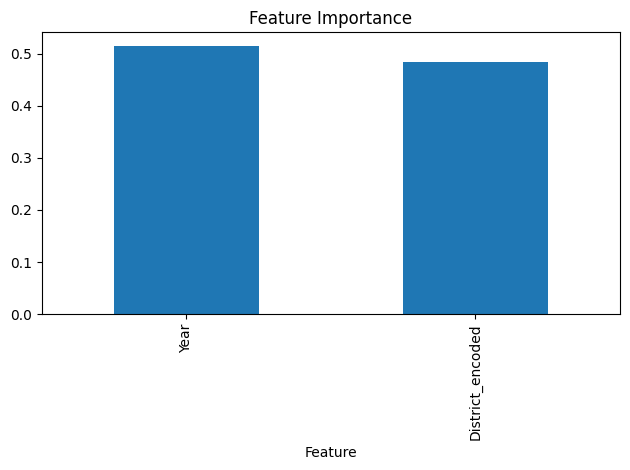

In [ ]:
import pandas as pd
importances = dt_model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df.sort_values(by="Importance", ascending=False).plot.bar(x='Feature', y='Importance', legend=False)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


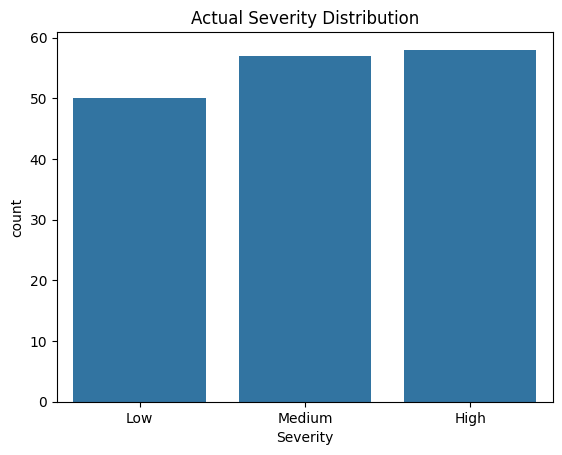

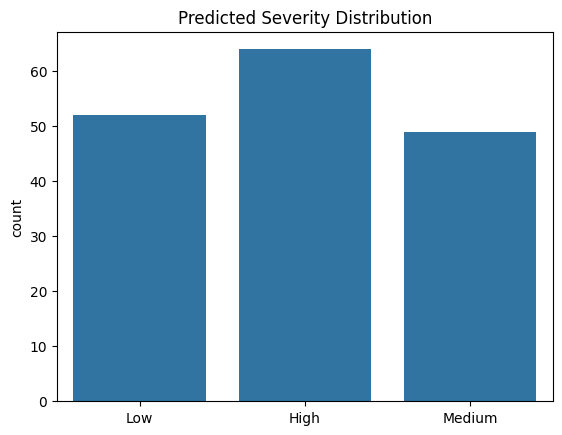

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_test)
plt.title("Actual Severity Distribution")
plt.show()

sns.countplot(x=dt_pred)
plt.title("Predicted Severity Distribution")
plt.show()


<ipython-input-135-385527057>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_long, x="Year", y="Accidents", ci=None)


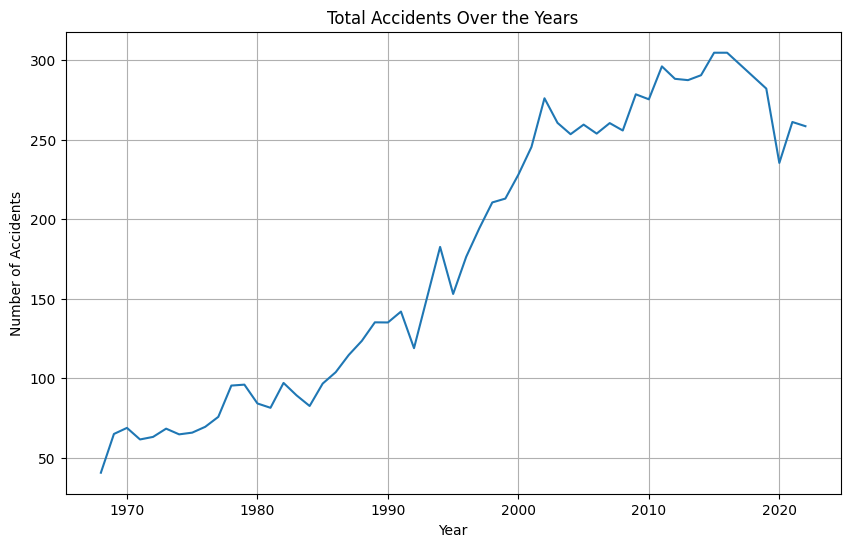

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x="Year", y="Accidents", ci=None)
plt.title("Total Accidents Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

<ipython-input-136-274849588>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_districts.values, y=top_districts.index, palette="Reds_r")


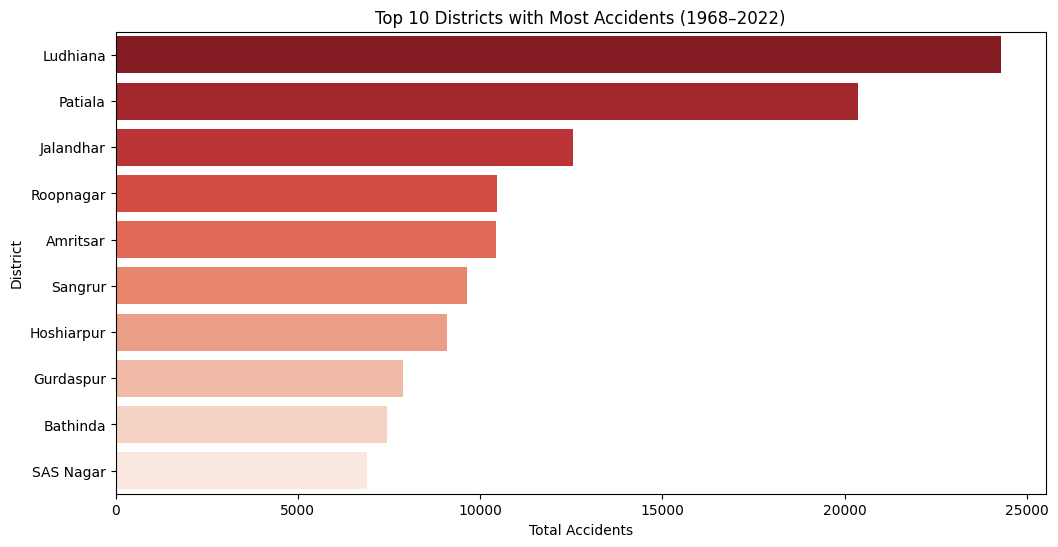

In [ ]:
top_districts = df_long.groupby("District")["Accidents"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_districts.values, y=top_districts.index, palette="Reds_r")
plt.title("Top 10 Districts with Most Accidents (1968–2022)")
plt.xlabel("Total Accidents")
plt.ylabel("District")
plt.show()